<img src="Images/Ballenas_logo.jpg">
# Ballenas Secondary Two Unit Cube Satellite Payload Data Analysis
Notebook developed by Rebecca Marshall and Carl Savage

### Background and Description of Payload's Experiment
Arduinos have been an optimal choice for the University Of British Columbia’s Rocket Team on their previous cube satellites because of their plug-and-play style and simplicity. However, Arduinos have their limitations; by testing and assessing the performance and efficiency of an alternative computer, a broader choice of mini-computers for future CubeSat missions is presented. Raspberry Pis’ ability to multitask and compute at a faster rate are what could possibly make them superior to Arduino’s for CubeSat missions. They are also able to be programmed in a wide range of computational languages, rendering it more accessible than an Arduino, which must be programmed in Arduino or C/C++. According to circuitdigest.com, Raspberry Pi 3Bs are 40x faster than Arduinos. This is an important aspect to consider for accurate and satisfactory data collection. 

To properly assess the Raspberry Pi 3B computer and its ability to perform certain tasks in a harsh launch environment, five Pi’s will be assigned a specific experiment. It's important that a single variable is constant on all the Pis during the experiment so their performance can be closely compared. This variable will be a simple computational program (description can be found below). One Pi will only run this program (1st Pi) and will set the baseline of which the other Pi’s performance can be compared too. One experiment includes environmental data collected from the PiHat (2nd Pi) (a computational “hat” fitted with gyroscopes and environmental data collectors), which will determine if the Hat is a sufficient component for a launch environment. Another experiment is a mechanical relay controlled by a Pi (3rd Pi). It will be turning an LED on and off while simultaneously being recorded by a PiCamera. The camera will also record the LED display flashing on and off from the second PiHat (4th Pi). The footage collected will be used to analyze the performance of the relay, light display and the PiCamera itself which is the final experiment (5th Pi). 

The experiment is suspected to last at least one hour, after that the batteries will die. Over a 20 minute duration, the data collected from all the Pi’s will amount to approximately 0.75 GB. This will be immediately analyzed in the prebuilt Jupyter Notebooks once the data is retrieved from the satellite. These experiments will both gather data and provide valuable insights into the potential strengths and weaknesses of using a Raspberry Pi during the launch environment in cube satellites.

### Objective
This notebook is meant to analyze the ability of a Raspberry Pi 3B to function and operate while experiencing the extreme conditions of the rocket launch and flight. This satellite flew on the University of British Columbia's 10 000 ft Cypress rocket. By analyzing the data, we will be able to distiguish discrepancies in the data by comparing them to static tests. Anomalies and points of failure will help us determine if the Pis operated without being disturbed by the extreme environment.

### Description of Computational Program
To meet the desires of the science team, software devised a computational program that would calculate a set equation while printing the time it took to calculate each iteration. The equation used is 'x^2' where x increases by 1 each time. By choosing an equation for the pi to calculate, it can be easily analyzed by graphing and checking for anomlies. Due to the size of the files and the worry of the memory overfilling, data is written to a new file every five minutes. If the pi turns off during the flight, the data will not overwrite the previous files. 

## Static Test
This static test will be compared to the data we collect from the satellite and serve as a benchmark for the pi to follow.

In [1]:
#import of libraries.
#this cell must be run each time the notebook is started.
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# these next fews cells imports the following datafiles from the computational program
data0s = pd.read_csv('Datafiles/CompStatic/calcresults0static.txt')
#data0s.info()
data1s = pd.read_csv('Datafiles/CompStatic/calcresults1static.txt')
#data1s.info()
data2s = pd.read_csv('Datafiles/CompStatic/calcresults2static.txt')
#data2s.info()

In [3]:
datastatic = pd.concat([data0s, data1s, data2s]) # this will combine the three datafiles into one
datastatic.info()
iterationstatic = datastatic['iteration'] # assign data to a variable to be called up later
timestatic = datastatic['time']
resultstatic = datastatic['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151485 entries, 0 to 1042819
Data columns (total 3 columns):
iteration    int64
time         float64
result       int64
dtypes: float64(1), int64(2)
memory usage: 96.2 MB


### Static Analysis
The cells below will analyze the data and attempt to find points of failure for the performance of the pi. If points of failure are found, they can be anaylzed in greater depth. The data collected from this pi includes one set of files from the computational program which includes three variables; iteration, time and result. Iteration runs through from 0+ and is plugged in as 'x' into the equation 'x^2'. The result is the answer to this equation and the time is printed for every iteration calculated. The data below is from a static test and will be compared to the data from the satellite.

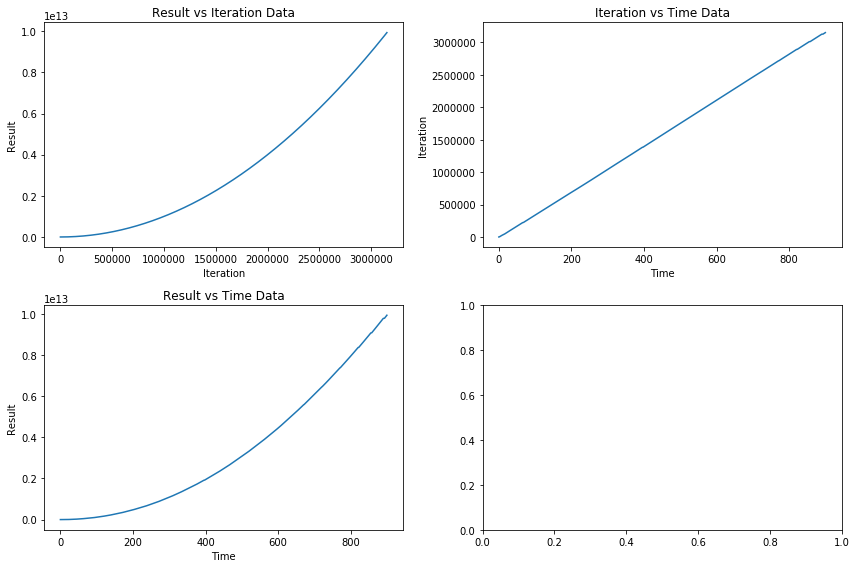

In [31]:
#this cell plots the data compared to each variable
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationstatic, resultstatic)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timestatic, iterationstatic)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timestatic, resultstatic)
      
fig.tight_layout()
plt.show()

In [32]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxRS = max(resultstatic)
maxIS = max(iterationstatic)
maxTS = max(timestatic)
if max(resultstatic) == (max(iterationstatic)**2):
    print('The program calculated the equation properly.')
else:
    print('Program didnt properly calculate the equation')

The program calculated the equation properly.


In [33]:
# finding the time it took the program to write the amount of iterations
maxminS = maxTS/60
print('It took',maxTS,'seconds or',maxminS,'minutes to calculate', maxIS,'iterations.')

It took 900.000367403 seconds or 15.0000061234 minutes to calculate 3151484 iterations.


## Computational Program Analysis From Computational Pi (1)
This section will analyze the data collected from the computational pi. This computer is only running the computational program and will set a baseline for the other pis to be compared too.  

In [34]:
# these next fews cells imports the following datafiles from the computational program
#change the location name of the file folder
#add/remove however many files there is

data0 = pd.read_csv('Datafiles/Comp/calcresults0.txt')
#data0.info()

In [35]:
# this will combine all the datafiles into one
dataC = pd.concat([data0]) 
dataC.info()
iterationC = dataC['iteration'] # assign data to a variable to be called up later
timeC = dataC['time']
resultC = dataC['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15793 entries, 0 to 15792
Data columns (total 3 columns):
iteration    15793 non-null int64
time         15792 non-null float64
result       15792 non-null float64
dtypes: float64(2), int64(1)
memory usage: 493.5 KB


### Graphical Analysis
Remember, the computational program calculates the equation x^2 so by graphing the data, discrepancies can be easily spotted.

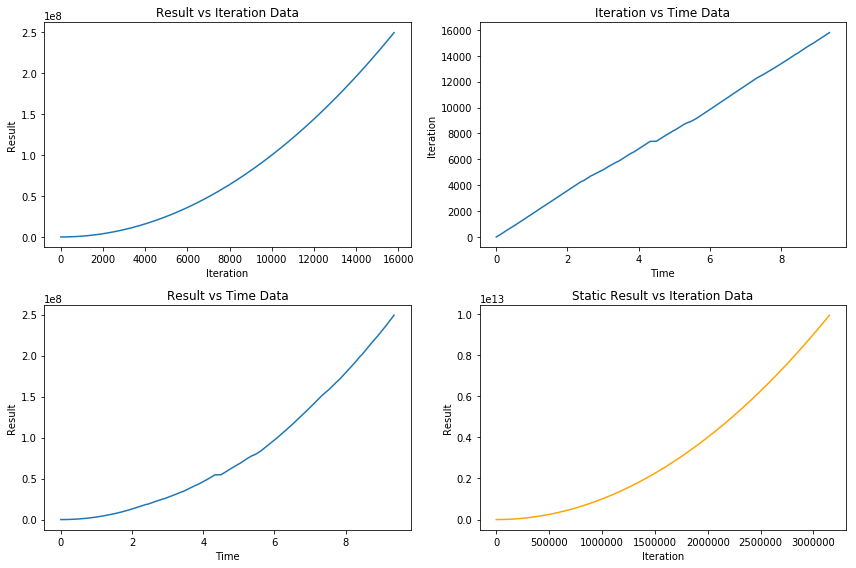

In [36]:
#this cell plots the data compared to each variable
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationC, resultC)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timeC, iterationC)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timeC, resultC)

plot4.set_xlabel('Iteration')
plot4.set_ylabel('Result')
plot4.set_title('Static Result vs Iteration Data')
plot4.plot(iterationstatic, resultstatic, color='orange')
      
fig.tight_layout()
plt.show()

### Observations
Besides the few points on the Result and Iteration vs Time graphs where it took slightly longer to calculate, each of the graphs are similar to the static. There seem to be no large anomolies or missed iterations.

### Other Analytics
The cells below will determine other points of failure and display how long the Pi ran for before shutting off.   

In [10]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxR = max(resultC)
maxI = max(iterationC)
maxT = max(timeC)
if maxR == (maxI**2):                  # sometimes you will have to add '-1' after iterationC because when the pi
    print('The program calculated the equation correctly.') # shuts off, it might not write the entire line in the file so you have
else:                                                       # to take the second last iteration
    print('Program didnt properly calculate the equation')

The program calculated the equation correctly.


In [11]:
# finding the time it took the program to write the total amount of iterations
maxmin = maxT/60
print('The Pi ran for',maxT,'seconds or',maxmin,'minutes and calculated', maxI,'iterations during that time.')

The Pi ran for 9.3573346138 seconds or 0.155955576897 minutes and calculated 15791 iterations during that time.


In [12]:
# this cell will compare the amount of time it took to calculate the equation to the static
staticC = (maxTS/maxIS)*100000
testC = (maxT/maxI)*100000
print('The static test calculated approximately 100,000 iterations in',staticC,'seconds while the pi from the satellite did so in', testC,'seconds. This is an average from the entire running time for the Pi.')

The static test calculated approximately 100,000 iterations in 28.5579862504 seconds while the pi from the satellite did so in 59.2573910063 seconds. This is an average from the entire running time for the Pi.


_______________________________________________________________________________________________________________________________
# Data Analysis from Environmental Pi (2)

This section displays data collected from one of the Raspberry Pi 3 Model B's. This pi will be running the computational program and collecting environmental data from the PiHat.  

### Objective

The PiHat collects a vast array of environmental data including temperature, humidity, pressure, acceleration and gyro. This data will help determine the type of conditions the Pi experienced while in flight. This will also test the capability of a Raspberry Pi running multiple programs efficiently while enduring an extreme environment. 

## Computational Program Analysis From Satellite (Environmental Pi)
The cells below will upload the files and analyze the data collected while also comparing it to the static test.

In [13]:
# these next fews cells imports the following datafiles from the computational program
#change the location name of the file folder
#add/remove however many files there is

#data0 = pd.read_csv('Datafiles/Environ/calcresults0.txt')
#data0.info()

data1E = pd.read_csv('Datafiles/Environ/calcresults1.txt')
#data1.info()

data2E = pd.read_csv('Datafiles/Environ/calcresults2.txt')
#data2E.info()

data3E = pd.read_csv('Datafiles/Environ/calcresults3.txt')
#data3E.info()

data4E = pd.read_csv('Datafiles/Environ/calcresults4.txt')
#data4E.info()

data5E = pd.read_csv('Datafiles/Environ/calcresults5.txt')
#data5E.info()

data6E = pd.read_csv('Datafiles/Environ/calcresults6.txt')
#data6E.info()

data7E = pd.read_csv('Datafiles/Environ/calcresults7.txt')
#data7E.info()

data8E = pd.read_csv('Datafiles/Environ/calcresults8.txt')
#data8E.info()

data9E = pd.read_csv('Datafiles/Environ/calcresults9.txt')
#data9E.info()

data10E = pd.read_csv('Datafiles/Environ/calcresults10.txt')
#data10E.info()

data11E = pd.read_csv('Datafiles/Environ/calcresults11.txt')
#data11E.info()

data12E = pd.read_csv('Datafiles/Environ/calcresults12.txt')
#data12E.info()

data13E = pd.read_csv('Datafiles/Environ/calcresults13.txt')
#data13E.info()

#data14E = pd.read_csv('Datafiles/Environ/calcresults14.txt')
#data14E.info()

In [14]:
# this will combine all the datafiles into one
dataE = pd.concat([data1E, data2E, data3E, data4E, data5E, data6E, data7E, data8E, data9E, data10E, data11E, data12E, data13E]) 
dataE.info()
iterationE = dataE['iteration'] # assign data to a variable to be called up later
timeE = dataE['time']
resultE = dataE['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6753985 entries, 0 to 564326
Data columns (total 3 columns):
iteration    int64
time         float64
result       int64
dtypes: float64(1), int64(2)
memory usage: 206.1 MB


### Graphical Analysis
Remember, the computational program calculates the equation x^2 so by graphing the data, discrepancies can be easily spotted.

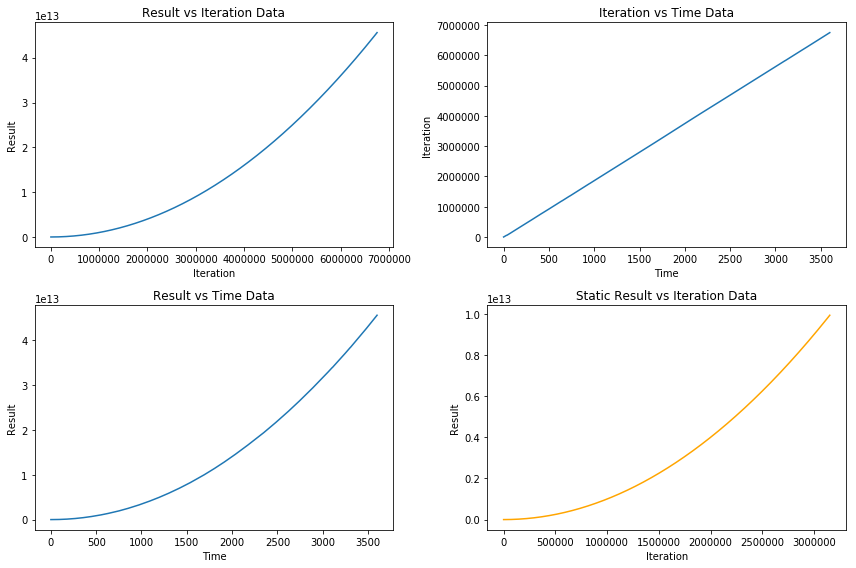

In [15]:
#this cell plots the data as the result as a function of the iteration
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationE, resultE)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timeE, iterationE)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timeE, resultE)

plot4.set_xlabel('Iteration')
plot4.set_ylabel('Result')
plot4.set_title('Static Result vs Iteration Data')
plot4.plot(iterationstatic, resultstatic, color='orange')
      
fig.tight_layout()
plt.show()

### Observations
The graphs display curves and lines that are similar to the static and show no large anomolies in the data. When examining the sizes of each datafile, the first one is very small compared to others. This is because the pi shut off and restarted which lead it to close the file and begin a new one. The cell below confirms this by displaying the steep drop at the end which translates to the pi not finishing writing the whole number for 'result' (eg. instead of writing 143754, it only wrote 143 before shutting off).

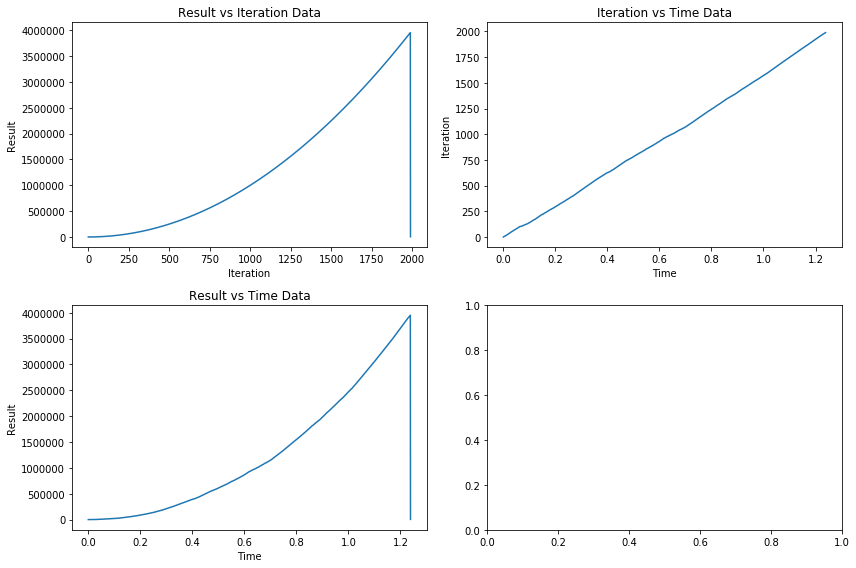

In [16]:
#plotting the first datafile only

iterationT = data1E['iteration'] # assign data to a variable to be called up later
timeT = data1E['time']
resultT = data1E['result']

fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationT, resultT)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timeT, iterationT)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timeT, resultT)

      
fig.tight_layout()
plt.show()

### Other Analytics
The cells below will determine other points of failure and display how long the Pi ran for before shutting off. 

In [17]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxRE = max(resultE)
maxIE = max(iterationE)
maxTE = max(timeE)
if maxRE == (maxIE**2):                                     # sometimes you will have to add '-1' after maxIE because when the pi
    print('The program calculated the equation correctly.') # shuts off, it might not write the entire line in the file so you have
else:                                                       # to take the second last iteration
    print('Program didnt properly calculate the equation')

The program calculated the equation correctly.


In [18]:
# finding the time it took the program to write the total amount of iterations
maxminE = maxTE/60
print('The Pi ran for',maxTE,'seconds or',maxminE,'minutes and calculated', maxIE,'iterations during that time.')

The Pi ran for 3600.00606394 seconds or 60.0001010656 minutes and calculated 6751994 iterations during that time.


In [19]:
# this cell will compare the amount of time it took to calculate the equation to the static
staticC = (maxTS/maxIS)*100000
testE = (maxTE/maxIE)*100000
print('The static test calculated approximately 100,000 iterations in',staticC,'seconds while the pi from the satellite did so in', testE,'seconds. This is an average from the entire running time of the Pi.')

The static test calculated approximately 100,000 iterations in 28.5579862504 seconds while the pi from the satellite did so in 53.317672734 seconds. This is an average from the entire running time of the Pi.


## Environmental Data Analysis From Satellite

Unforunately no environmental data was collected from the satellite. The extreme heat (above 40 degrees celsius) of the satellite could have been one of the reasons why the the PiHat failed to work.

_____________________________________________________________________________________________________________________________
# Data Analysis from Mechanical Relay Pi (3)

This section displays data collected from one of the Raspberry Pi 3 Model B's. This pi will be running the computational program and another program that will turn a mechanical relay on and off. The relay will be turning an LED on and off and will be recorded by the Pi Camera.  


## Computational Program Analysis From Satellite
The cells below will upload the files and analyze the data collected while also comparing it to the static test. 

In [20]:
# these next fews cells imports the following datafiles from the computational program
#change the location name of the file folder
#add/remove however many files there is

data0R = pd.read_csv('Datafiles/Relay/calcresults0.txt')
#data0R.info()

data1R = pd.read_csv('Datafiles/Relay/calcresults1.txt')
#data1R.info()

data2R = pd.read_csv('Datafiles/Relay/calcresults2.txt')
#data2R.info()

data3R = pd.read_csv('Datafiles/Relay/calcresults3.txt')
#data3R.info()

data4R = pd.read_csv('Datafiles/Relay/calcresults4.txt')
#data4R.info()

data5R = pd.read_csv('Datafiles/Relay/calcresults5.txt')
#data5R.info()

data6R = pd.read_csv('Datafiles/Relay/calcresults6.txt')
#data6R.info()

data7R = pd.read_csv('Datafiles/Relay/calcresults7.txt')
#data7R.info()

data8R = pd.read_csv('Datafiles/Relay/calcresults8.txt')
#data8R.info()

data9R = pd.read_csv('Datafiles/Relay/calcresults9.txt')
#data9R.info()

data10R = pd.read_csv('Datafiles/Relay/calcresults10.txt')
#data10R.info()

data11R = pd.read_csv('Datafiles/Relay/calcresults11.txt')
#data11R.info()

data12R = pd.read_csv('Datafiles/Relay/calcresults12.txt')
#data12R.info()

In [21]:
# this will combine all the datafiles into one
dataR = pd.concat([data0R, data1R, data2R, data3R, data4R, data5R, data6R, data7R, data8R, data9R, data10R, data11R, data12R]) 
dataR.info()
iterationR = dataR['iteration'] # assign data to a variable to be called up later
timeR = dataR['time']
resultR = dataR['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6865423 entries, 0 to 72452
Data columns (total 3 columns):
iteration    int64
time         float64
result       float64
dtypes: float64(2), int64(1)
memory usage: 209.5 MB


### Graphical Analysis
Remember, the computational program calculates the equation x^2 so by graphing the data, discrepancies can be easily spotted.

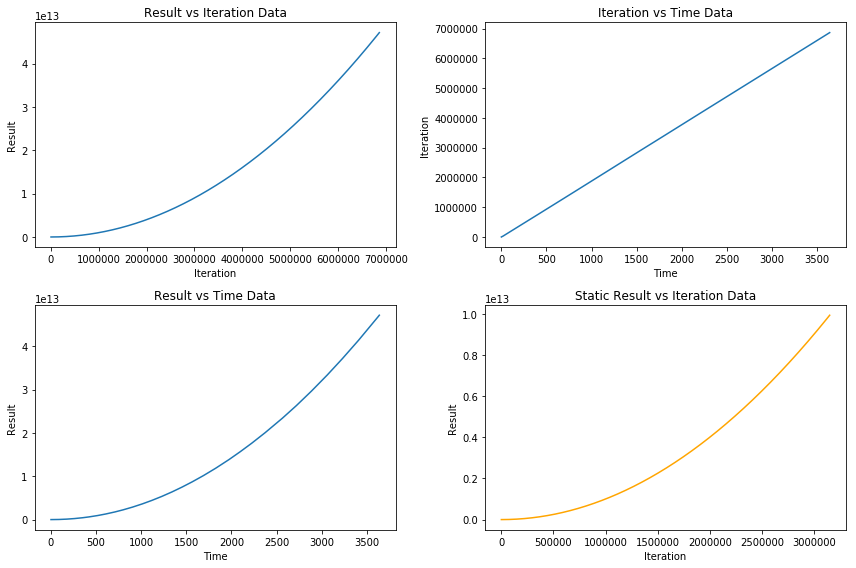

In [22]:
#this cell plots the data as the result as a function of the iteration
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationR, resultR)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timeR, iterationR)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timeR, resultR)

plot4.set_xlabel('Iteration')
plot4.set_ylabel('Result')
plot4.set_title('Static Result vs Iteration Data')
plot4.plot(iterationstatic, resultstatic, color='orange')
      
fig.tight_layout()
plt.show()

### Obervations
The graphs show no large discrepancies and the graphs are similar to the static tests. The Pi never shut off during the middle of test, only at the very end.

### Other Analytics
The cells below will determine other points of failure and display how long the Pi ran for before shutting off.

In [23]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxRR = max(resultR)
maxIR = max(iterationR)
maxTR = max(timeR)
if max(resultR) == (max(iterationR-1)**2):                  # sometimes you will have to add '-1' after iteration because when the pi
    print('The program calculated the equation correctly.') # shuts off, it might not write the entire line in the file so you have
else:                                                       # to take the second last iteration
    print('Program didnt properly calculate the equation')

The program calculated the equation correctly.


In [24]:
# finding the time it took the program to write the total amount of iterations
maxminR = maxTR/60
print('The Pi ran for',maxTR,'seconds or',maxminR,'minutes and calculated', maxIR,'iterations during that time.')

The Pi ran for 3638.25728416 seconds or 60.6376214027 minutes and calculated 6865422 iterations during that time.


In [25]:
# this cell will compare the amount of time it took to calculate the equation to the static
staticC = (maxTS/maxIS)*100000
testR = (maxTR/maxIR)*100000
print('The static test calculated approximately 100,000 iterations in',staticC,'seconds while the pi from the satellite did so in', testR,'seconds. This an average from the entire running time of the Pi.')

The static test calculated approximately 100,000 iterations in 28.5579862504 seconds while the pi from the satellite did so in 52.9939351749 seconds. This an average from the entire running time of the Pi.


## Relay Analysis
The datafile collected from the program that switched the relay contained two variables: time and on/off where it printed 0 for off and 1 for one.

In [26]:
# loading datafile using pandas
dataRR = pd.read_csv('Datafiles/Relay/RelayLog0.txt')
dataRR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 2 columns):
time      7266 non-null float64
on/off    7266 non-null int64
dtypes: float64(1), int64(1)
memory usage: 113.6 KB


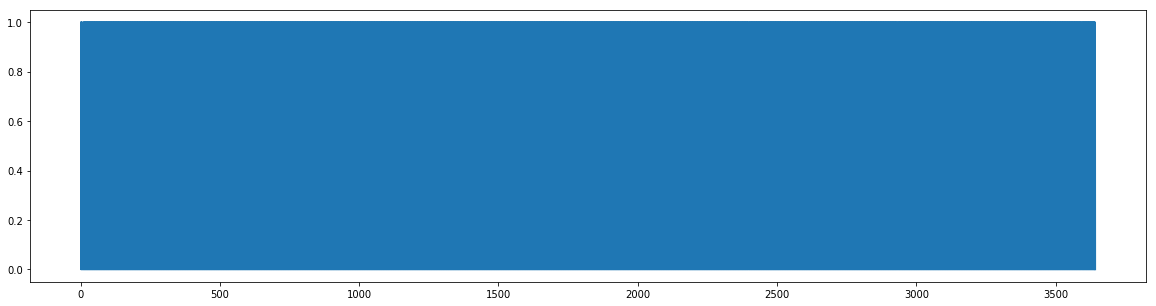

In [27]:
# assigns the data to a variable
plt.figure(figsize=(20,5))
timeRR = dataRR['time']
on_off = dataRR['on/off']
plt.plot(timeRR, on_off) # plot on_off vs time

### Observations
The graph displays the program writing 1, 0, 1, 0...etc over time. The size of this file makes it difficult to see the up and down motion of this graph.

In [28]:
# finds the time the relay program ran for
max_timeR = max(timeRR) # max time in seconds
max_timeRmin = max_timeR/60 # max time in minutes
print('The relay program ran for',max_timeR,'seconds or',max_timeRmin,'minutes.')

The relay program ran for 3642.86402678 seconds or 60.7144004464 minutes.


In [37]:
# compare the time each program ran for
Rd = {'Programs': ['Computational', 'Relay'],'Time (seconds)': [maxTR, max_timeR]}
Relaydf = pd.DataFrame(data=Rd)
Relaydf

,Programs,Time (seconds)
0,Computational,3638.257284
1,Relay,3642.864027


______________________________________________________________________________________________________________________________
# Data Analysis From PiHat LED Display Pi (4)
This section will analyze the data collected from the PiHat Light Display Pi. This computer is running the computational program and a program that flashes the LED display on the PiHat.  

### Results
No computational files were collected from this Pi.

________________________________________________________________________________________________________________________________
# Data Analysis From Camera Pi (5)
This section will analyze the data collected from the camera Pi. This Pi is only running the Pi camera, which will be recording the flashes of both the light display and the relay.  
### Objective
This Pi will be collecting a large datafile from the camera and will determine if it can effectively perform during a rocket launch and flight. It will also be testing the durability of the PiCamera.
### Results
Unfortunately the camera only captured a few seconds of footage before shutting off; most likely due to the extreme heat.

### Discussion/Conclusion

This satellite's objective was to analyze the performance of Raspberry Pi's whilst experiencing the extreme environment of the rocket launch. From the data collected, its difficult to reach a definite answer as to whether Raspberry Pis are a superior choice to Arduinos for cube satellite missions. 
    
There were many successes and failures within the performance of the Pis during the launch; four out of five Pis booted and ran for as short as a few seconds to as long as 60 minutes. The Pi running only the computational program (1) and the Pi running the camera (5), collected less than 10 seconds of data. LED display Pi (4) didn't collect any data, but the Environmental (2) and Mechanical Relay Pi (3) both collected computational data for 60 minutes. The relay also collected the data for the program switching the mechanical relay on and off. This satellite contained three Raspberry Pi components (two PiHats and one PiCamera) of which all failed to function during the entire mission. The extreme g-force of the rocket launch can be ruled out for a possible cause for these failures because the satellite was turned on and running all the programs before launch. If the g-force was the cause, there would be some data before the rocket was launched. The next possible reason for these component failures is the extreme heat the satellite experienced. The competition was held in the New Mexico desert where temperatures reached at least 38 degrees celsius and the payload resided in the nose cone with no air circulation. After recoverying the payload, the metal frame was hot to the touch and it was clearly evident that the temperature inside the satellite exceeded the outside temperature of the desert. Since the Pi componants failed to operate, we cannot conclude if they would have successfully funtioned during the rocket launch or while running multiple programs. The hot conditions are also a possible factor for the decreased rate of computation which was almost doubled for the three Pis that collected the computational program data. 

From the data collected, its evident that a possible factor for the failure of the Pi components (PiHats and PiCamera) was the hot conditions, however as many as four of the Raspberry Pis functioned during the extreme heat and g-force; some more successfully than others. The two Pis that didn't collect any computational data were positioned in the center of the satellite where the temperature is most likely to be the highest as it was sandwiched between other Pis. More testing is necessary to conclude if the Pi components will endure the rocket launch environment, however a couple of the Raspberry Pi 3B's did operate and complete the tasks set for them. That is reason enough to continue testing and utilizing the more versatile and powerful Raspberry Pi for missions that include enduring extreme environments.